# Exploratory Data Analysis

This notebook provides a starter analysis of financial data, including account states, transactions, and payments. It demonstrates how to load the input data and plots distributions for the population as well as time series for individual agents. This notebook does not do EDA on the labels. That is left up to you.

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from plotting import (
    plot_merchant_type_distribution,
    plot_transaction_amount_distribution,
    plot_event_distribution,
    plot_behavior_over_time,
    display_table_info
)

In [4]:
# Load data
account_state_log = pd.read_csv('../synthcc_train_set/account_state_log.csv')
transactions_log = pd.read_csv('../synthcc_train_set/transactions_log.csv', parse_dates=['timestamp'])
payments_log = pd.read_csv('../synthcc_train_set/payments_log.csv', parse_dates=['timestamp'])

In [5]:
account_state_log.head()

,agent_id,credit_balance,credit_utilization,interest_rate,min_payment_factor,current_missed_payments,timestamp
0,839,367.017294,0.367,0.191914,0.05,0,2023-01-01
1,179,638.371473,0.638,0.191758,0.05,0,2023-01-01
2,645,652.219191,0.326,0.235719,0.05,0,2023-01-01
3,170,777.674485,0.078,0.234455,0.05,0,2023-01-01
4,152,634.101608,0.317,0.247455,0.05,0,2023-01-01


In [6]:
# Display information for each table
display_table_info(account_state_log, 'account_state_log')
display_table_info(transactions_log, 'transactions_log')
display_table_info(payments_log, 'payments_log')

Schema and attributes of account_state_log:
   agent_id  credit_balance  credit_utilization  interest_rate  \
0       839      367.017294               0.367       0.191914   
1       179      638.371473               0.638       0.191758   
2       645      652.219191               0.326       0.235719   
3       170      777.674485               0.078       0.234455   
4       152      634.101608               0.317       0.247455   

   min_payment_factor  current_missed_payments   timestamp  
0                0.05                        0  2023-01-01  
1                0.05                        0  2023-01-01  
2                0.05                        0  2023-01-01  
3                0.05                        0  2023-01-01  
4                0.05                        0  2023-01-01   

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 373225 entries, 0 to 373224
Data columns (total 7 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------               

# Population Level Analysis

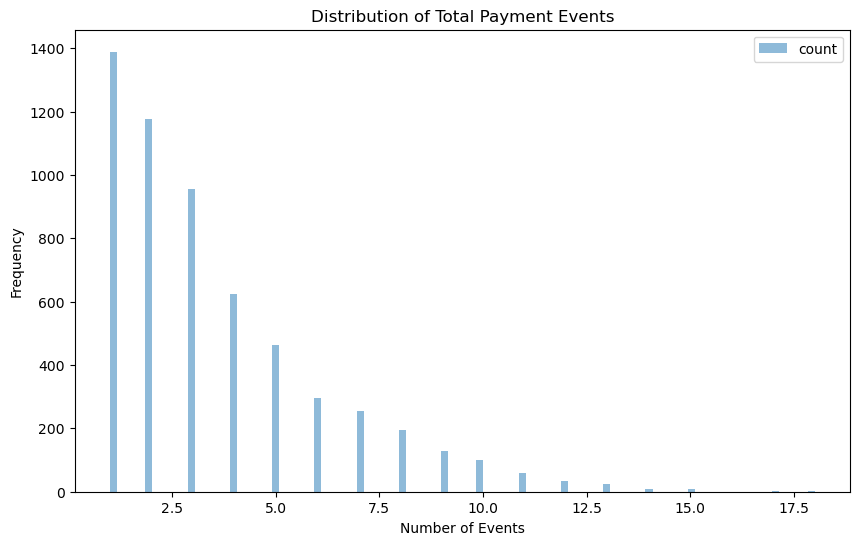

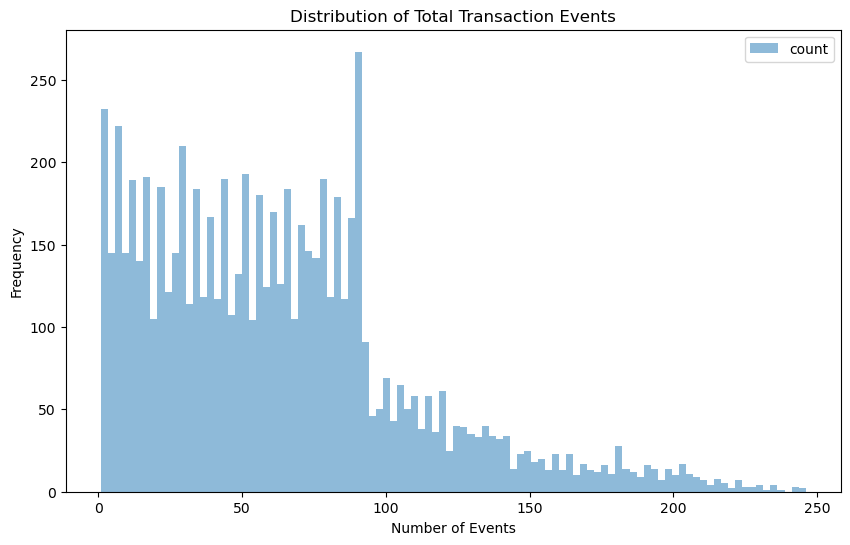

In [7]:
plot_event_distribution(payments_log, 'agent_id', 'Distribution of Total Payment Events', 'Number of Events')
plot_event_distribution(transactions_log, 'agent_id', 'Distribution of Total Transaction Events', 'Number of Events')

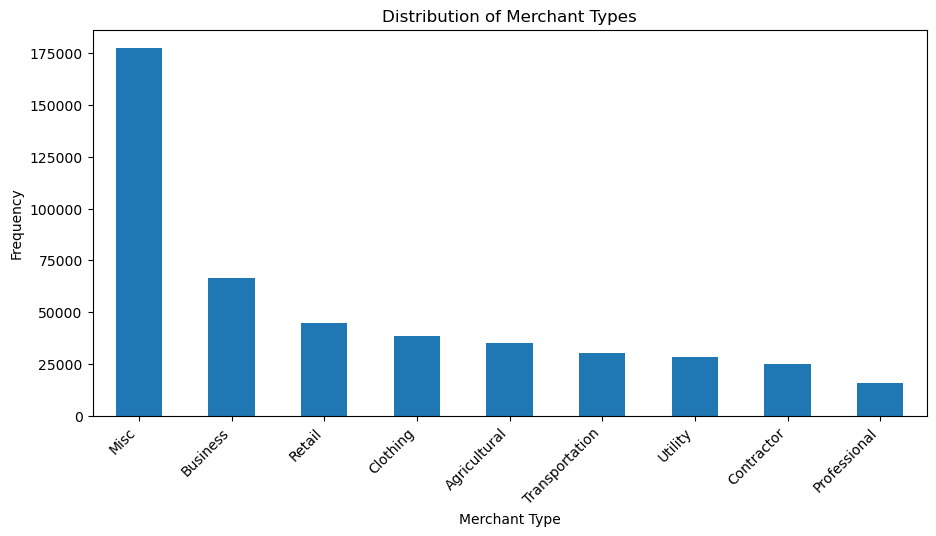

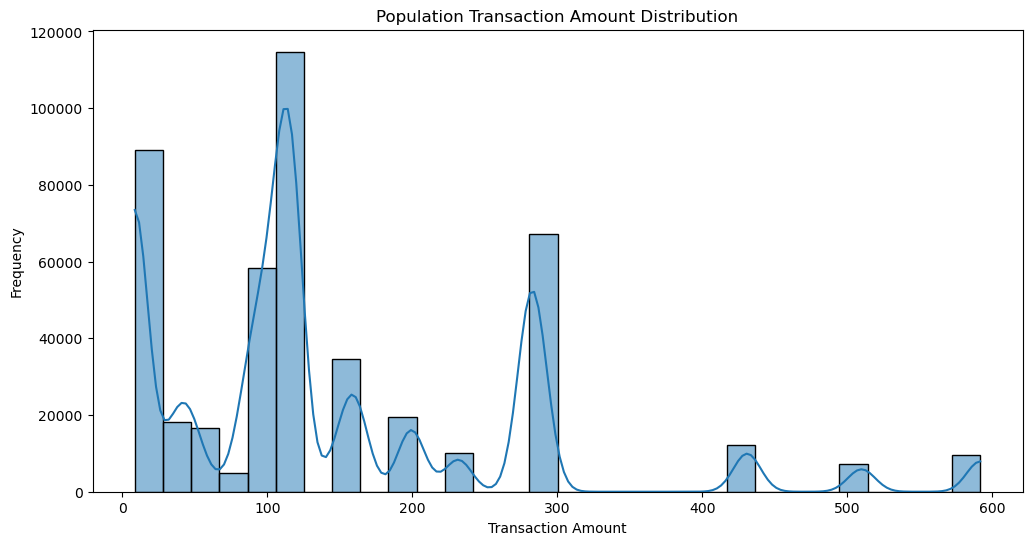

In [8]:
plot_merchant_type_distribution(transactions_log)
plot_transaction_amount_distribution(transactions_log)

Note in the following plots that different agents have time series that start at different points. This corresponds to credit cards opening at different times.

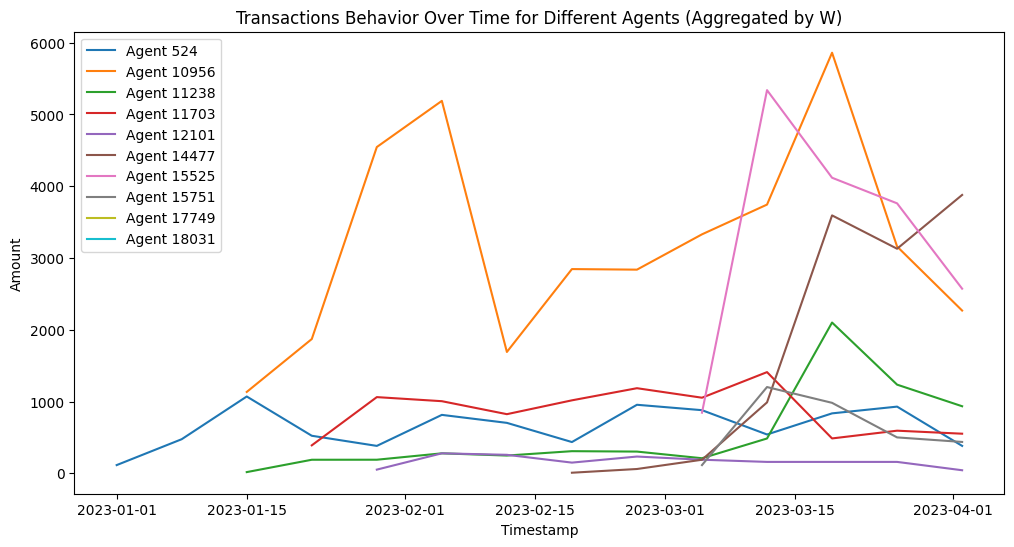

/Users/kpg188/Code/bth-starter-pack/synthcc_example_submission/plotting.py:285: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.


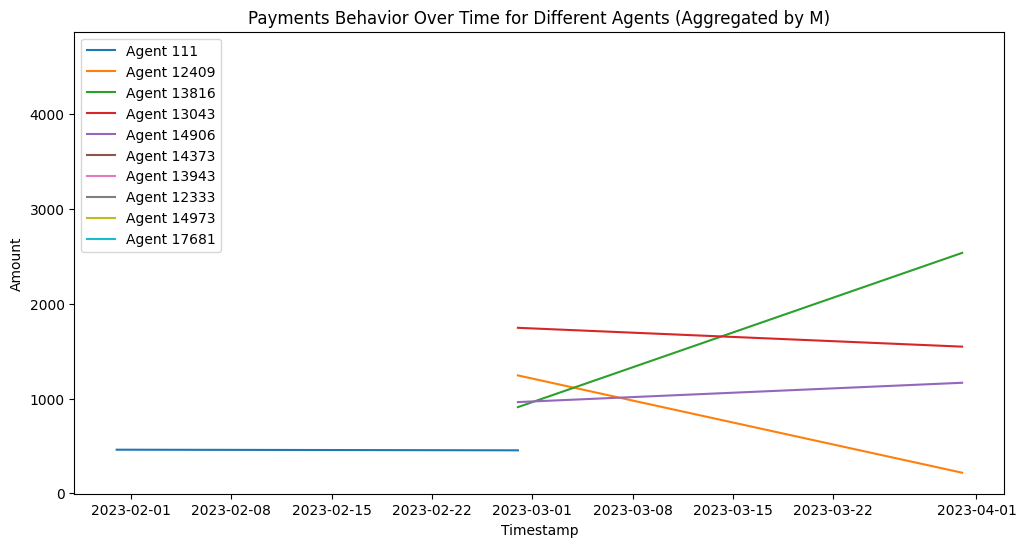

In [64]:
plot_behavior_over_time(transactions_log, sample_size=10, period='W', data_type='transactions')  # For transactions
plot_behavior_over_time(payments_log, sample_size=10, period='M', data_type='payments')  # For payments

            agent_id  credit_balance  credit_utilization  interest_rate  \
count  373225.000000   373225.000000       373225.000000  373225.000000   
mean    10419.587825     1498.157348            0.506131       0.203874   
min         0.000000        0.020853            0.000000       0.150003   
25%     10308.000000      591.653566            0.167000       0.180050   
50%     11746.000000      990.314556            0.439000       0.206908   
75%     13661.000000     1972.112508            0.938000       0.227920   
max     18190.000000     9999.794832            1.000000       0.249998   
std      5108.247268     1452.063347            0.358550       0.028195   

       min_payment_factor  current_missed_payments  \
count        3.732250e+05            373225.000000   
mean         5.000000e-02                 0.020548   
min          5.000000e-02                 0.000000   
25%          5.000000e-02                 0.000000   
50%          5.000000e-02                 0.000000   


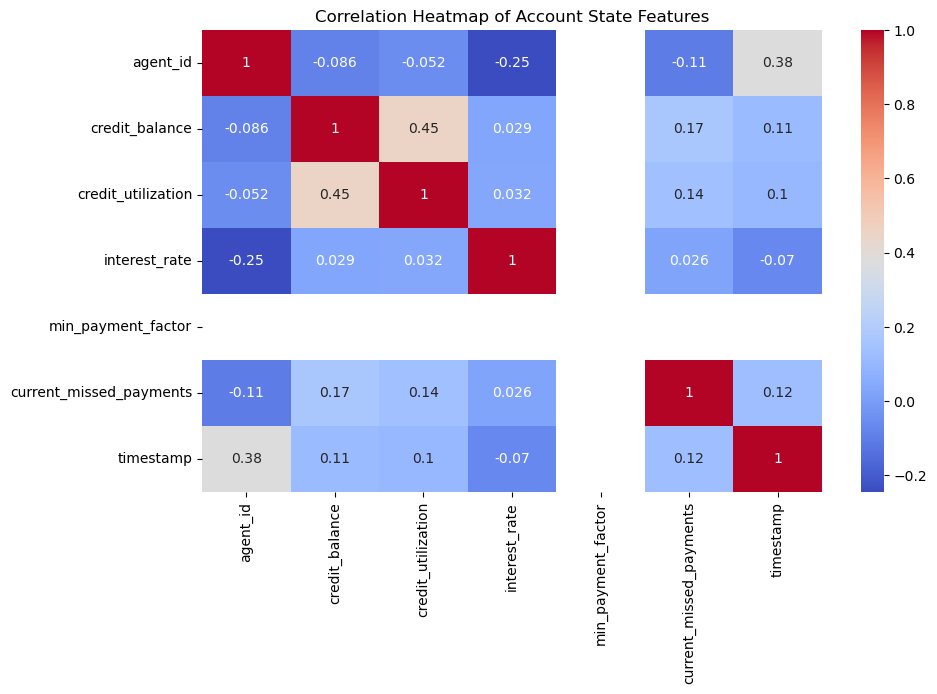

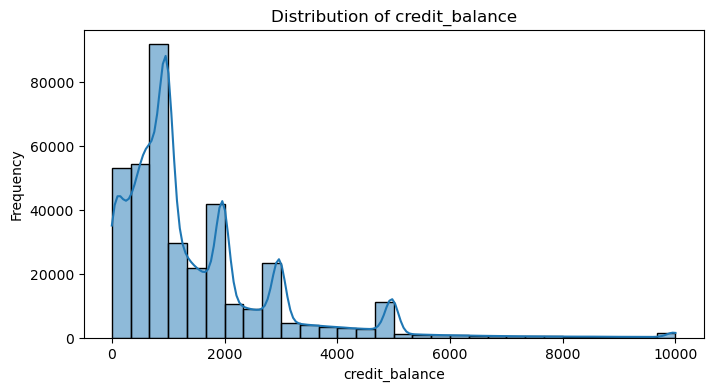

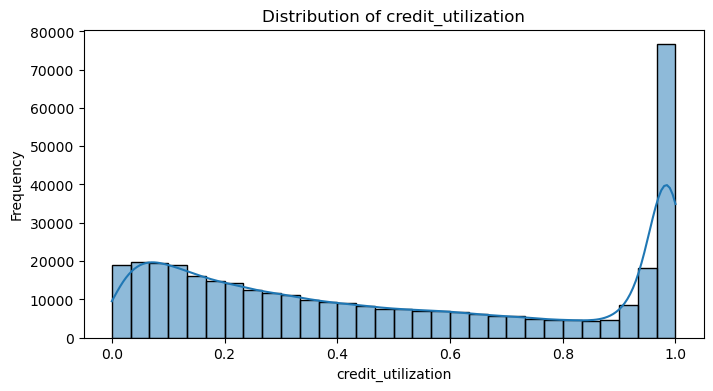

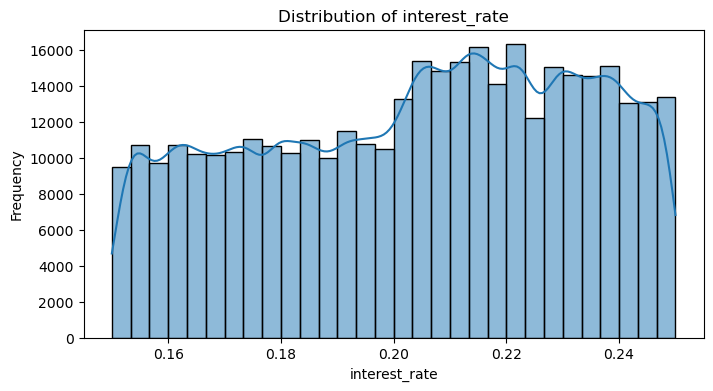

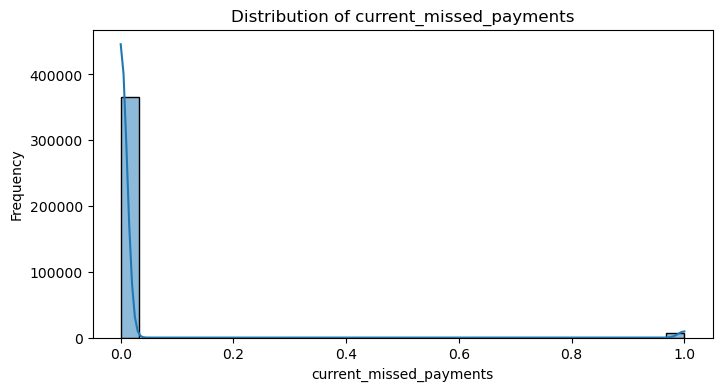

/var/folders/9y/l5hhng65561dy6k5_q7mjj2c0000gn/T/ipykernel_13839/653409946.py:28: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  agent_trend = account_state_log.groupby('agent_id').resample('M').mean()


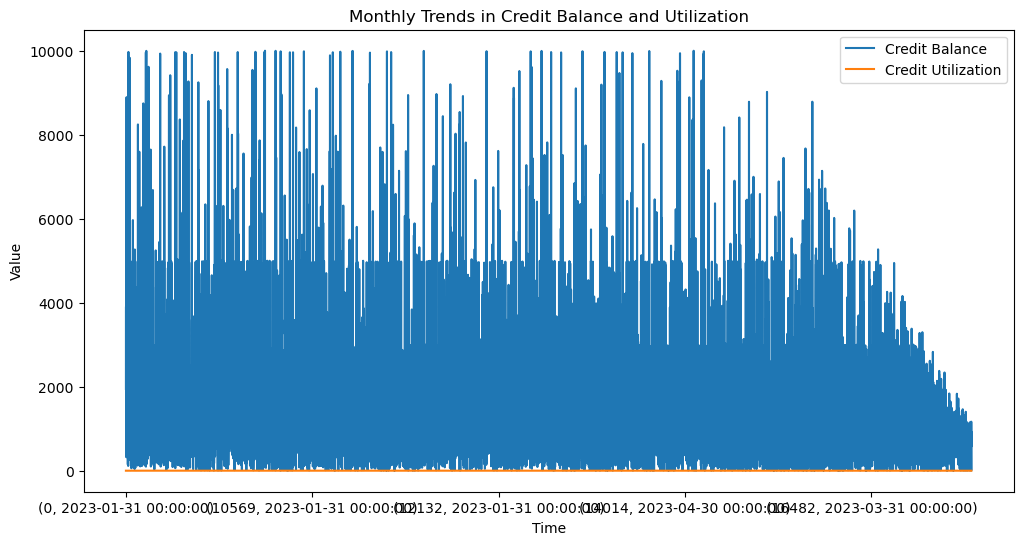

In [10]:
# Load data
account_state_log['timestamp'] = pd.to_datetime(account_state_log['timestamp'])

# Summary statistics
print(account_state_log.describe())

# Check for missing values
print(account_state_log.isnull().sum())

# Correlation heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(account_state_log.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap of Account State Features")
plt.show()

# Distribution of numerical features
numerical_features = ['credit_balance', 'credit_utilization', 'interest_rate', 'current_missed_payments']
for feature in numerical_features:
    plt.figure(figsize=(8, 4))
    sns.histplot(account_state_log[feature], kde=True, bins=30)
    plt.title(f"Distribution of {feature}")
    plt.xlabel(feature)
    plt.ylabel("Frequency")
    plt.show()

# Trends over time
account_state_log.set_index('timestamp', inplace=True)
agent_trend = account_state_log.groupby('agent_id').resample('M').mean()
agent_trend[['credit_balance', 'credit_utilization']].plot(figsize=(12, 6))
plt.title("Monthly Trends in Credit Balance and Utilization")
plt.xlabel("Time")
plt.ylabel("Value")
plt.legend(['Credit Balance', 'Credit Utilization'])
plt.show()

agent_id             0
status               0
amount               0
merchant_category    0
merchant_id          0
online               0
timestamp            0
dtype: int64


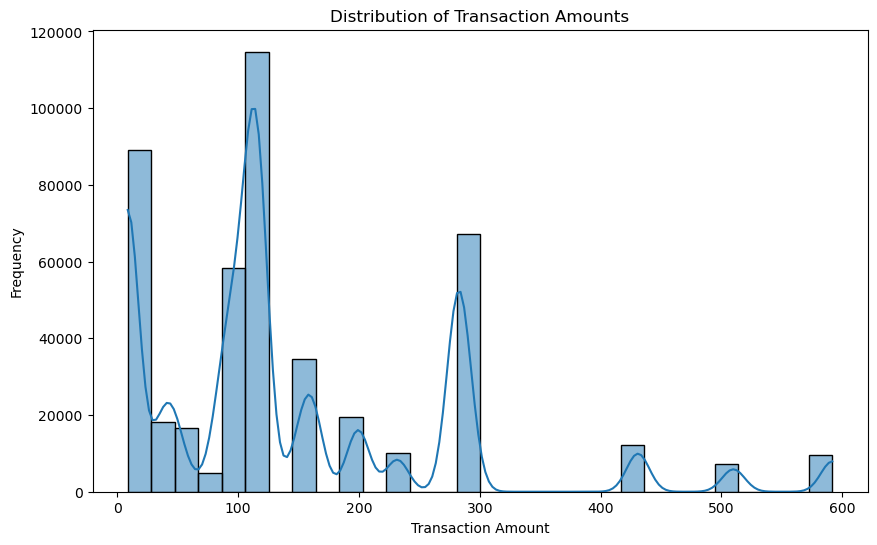

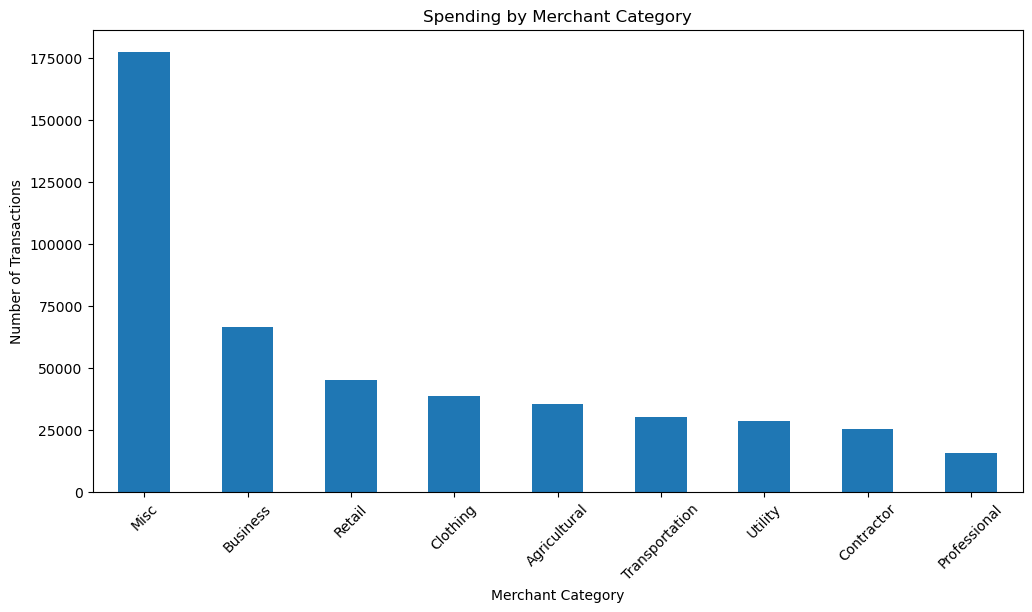

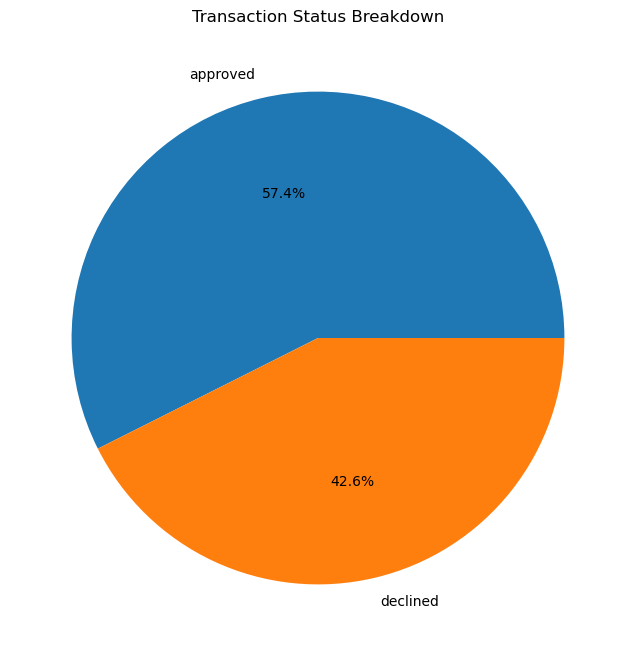

/var/folders/9y/l5hhng65561dy6k5_q7mjj2c0000gn/T/ipykernel_13839/794572784.py:30: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  spending_trend = transactions_log.groupby('agent_id').resample('M')['amount'].sum()


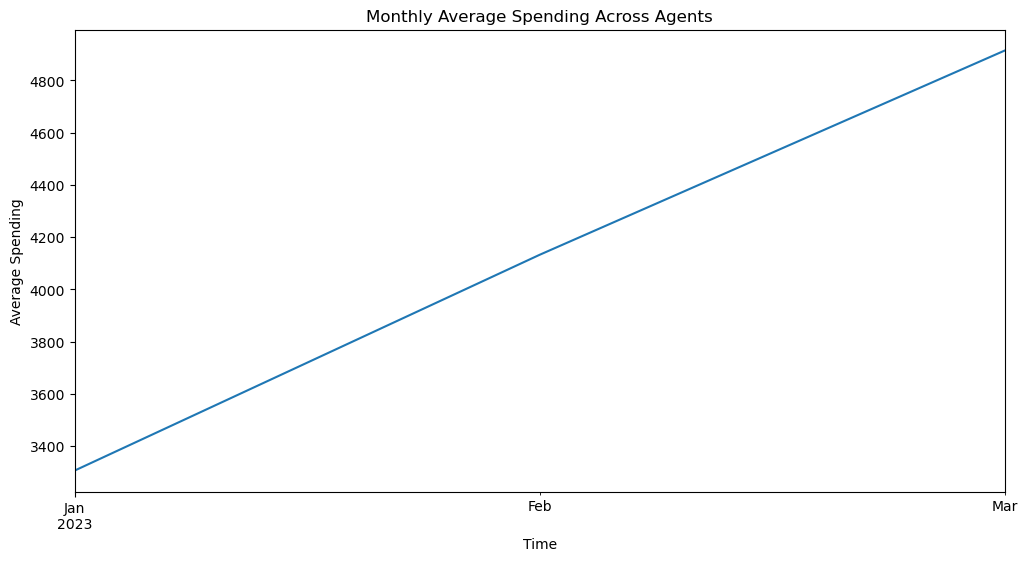

In [11]:
# Check for missing values
print(transactions_log.isnull().sum())

# Distribution of transaction amounts
plt.figure(figsize=(10, 6))
sns.histplot(transactions_log['amount'], kde=True, bins=30)
plt.title("Distribution of Transaction Amounts")
plt.xlabel("Transaction Amount")
plt.ylabel("Frequency")
plt.show()

# Spending patterns by merchant category
merchant_counts = transactions_log['merchant_category'].value_counts()
plt.figure(figsize=(12, 6))
merchant_counts.plot(kind='bar')
plt.title("Spending by Merchant Category")
plt.xlabel("Merchant Category")
plt.ylabel("Number of Transactions")
plt.xticks(rotation=45)
plt.show()

# Approval vs. rejection
status_counts = transactions_log['status'].value_counts()
status_counts.plot(kind='pie', autopct='%1.1f%%', figsize=(8, 8), title="Transaction Status Breakdown")
plt.ylabel("")
plt.show()

# Spending trends over time
transactions_log.set_index('timestamp', inplace=True)
spending_trend = transactions_log.groupby('agent_id').resample('M')['amount'].sum()
spending_trend.groupby(level=1).mean().plot(figsize=(12, 6))
plt.title("Monthly Average Spending Across Agents")
plt.xlabel("Time")
plt.ylabel("Average Spending")
plt.show()

agent_id     0
amount       0
timestamp    0
dtype: int64


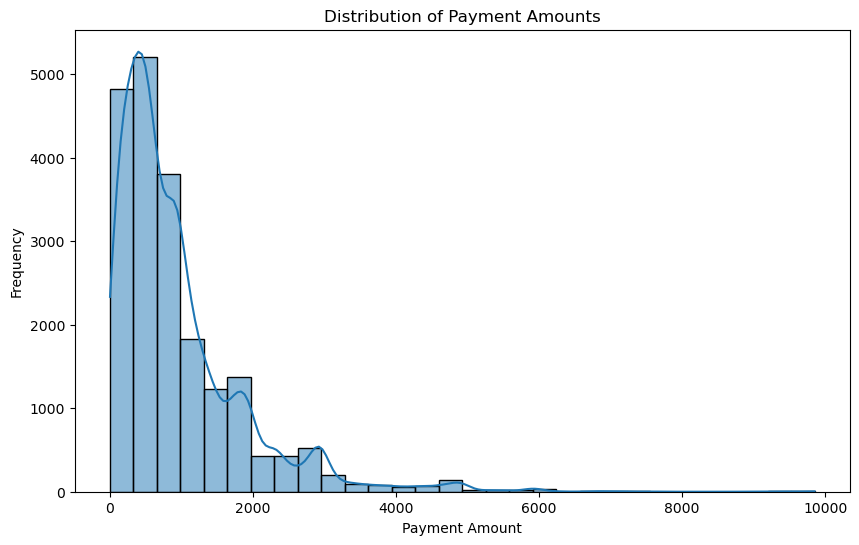

/var/folders/9y/l5hhng65561dy6k5_q7mjj2c0000gn/T/ipykernel_13839/4015104272.py:14: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  payment_trend = payments_log.groupby('agent_id').resample('M')['amount'].sum()


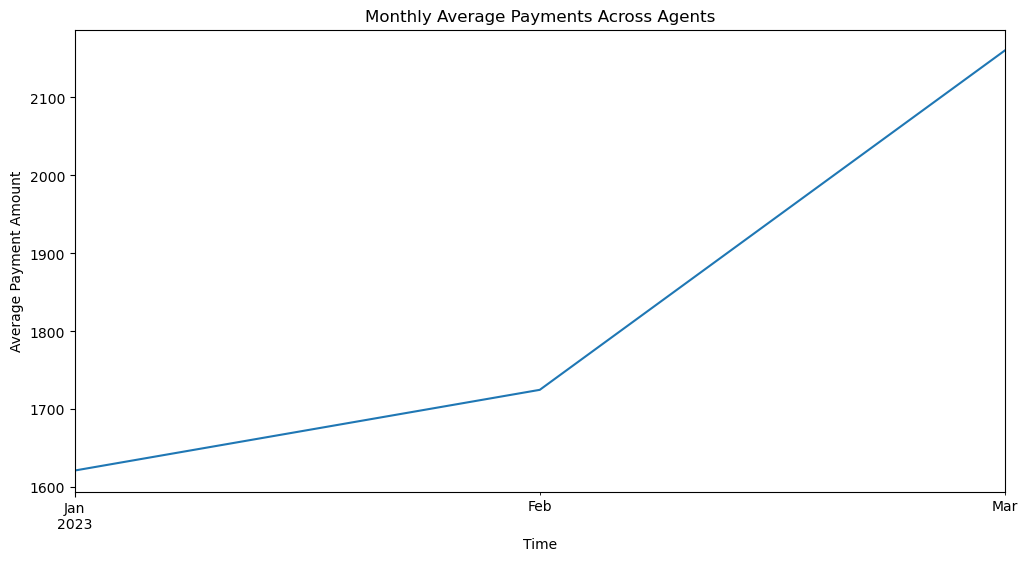

KeyError: 'Column not found: timestamp'

In [ ]:
# Check for missing values
print(payments_log.isnull().sum())

# Distribution of payment amounts
plt.figure(figsize=(10, 6))
sns.histplot(payments_log['amount'], kde=True, bins=30)
plt.title("Distribution of Payment Amounts")
plt.xlabel("Payment Amount")
plt.ylabel("Frequency")
plt.show()

# Payments over time
payments_log.set_index('timestamp', inplace=True)
payment_trend = payments_log.groupby('agent_id').resample('M')['amount'].sum()
payment_trend.groupby(level=1).mean().plot(figsize=(12, 6))
plt.title("Monthly Average Payments Across Agents")
plt.xlabel("Time")
plt.ylabel("Average Payment Amount")
plt.show()

# Consistency of paymentsa
payment_intervals = payments_log.groupby('agent_id')['timestamp'].diff().dt.days
plt.figure(figsize=(10, 6))
sns.histplot(payment_intervals, kde=True, bins=30)
plt.title("Distribution of Payment Intervals")
plt.xlabel("Days Between Payments")
plt.ylabel("Frequency")
plt.show()

          Offline  Online
status                   
approved   137714  127359
declined   103037   93594


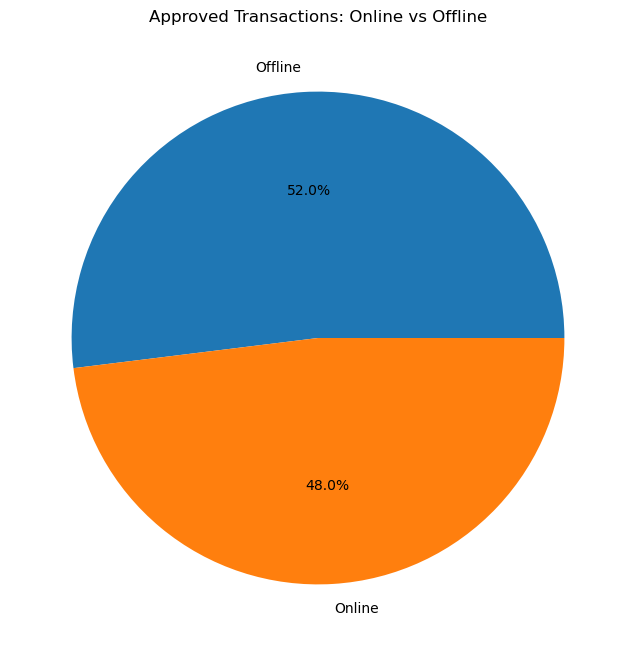

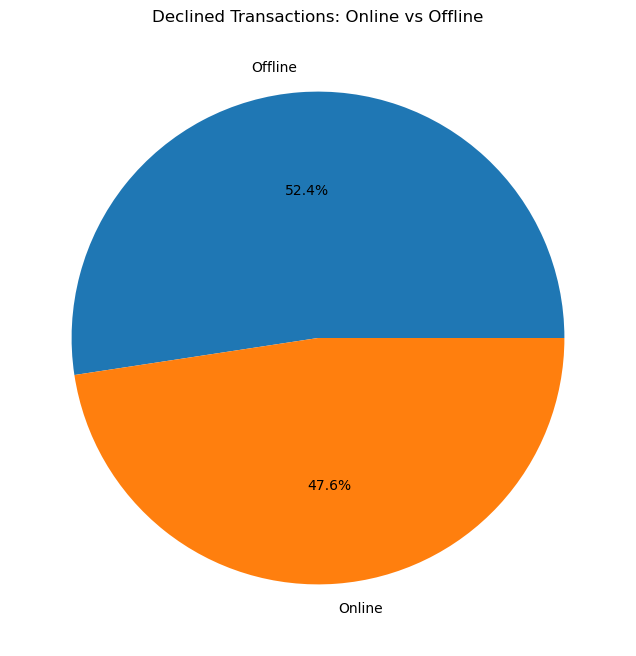

In [16]:
# Assuming transactions_log is loaded
# transactions_log = pd.read_csv('transactions_log.csv', parse_dates=['timestamp'])

# Count transactions based on status and online/offline
status_online_counts = transactions_log.groupby(['status', 'online']).size().unstack(fill_value=0)

# Rename columns for better readability
status_online_counts.columns = ['Offline', 'Online']
print(status_online_counts)

# Plot separate pie charts for approved and rejected
for status in status_online_counts.index:
    plt.figure(figsize=(8, 8))
    status_online_counts.loc[status].plot(
        kind='pie', 
        autopct='%1.1f%%', 
        title=f"{status.capitalize()} Transactions: Online vs Offline"
    )
    plt.ylabel("")  # Remove y-label for better appearance
    plt.show()

In [ ]:
import pandas as pd
import numpy as np
from datetime import timedelta
# Load datasets
account_state_log = pd.read_csv('../synthcc_train_set/account_state_log.csv', parse_dates=['timestamp'])
transactions_log = pd.read_csv('../synthcc_train_set/transactions_log.csv', parse_dates=['timestamp'])
payments_log = pd.read_csv('../synthcc_train_set/payments_log.csv', parse_dates=['timestamp'])
# Load datase
# Define a function to aggregate features
def aggregate_features(agent_id, log, date_col, value_col, windows):
    aggregated_data = []
    for window in windows:
        end_date = log[date_col].max()
        start_date = end_date - timedelta(days=window * 30)  # Approximate 1 month = 30 days
        agent_data = log[(log['agent_id'] == agent_id) & (log[date_col] >= start_date)]
        features = {
            f"{value_col}_mean_{window}m": agent_data[value_col].mean(),
            f"{value_col}_sum_{window}m": agent_data[value_col].sum(),
            f"{value_col}_std_{window}m": agent_data[value_col].std()
        }
        aggregated_data.append(features)
    return pd.DataFrame(aggregated_data).mean(axis=0)

# Aggregation for account_state_log
windows = [3, 6, 9, 12]
account_features = []
for agent_id in account_state_log['agent_id'].unique():
    agent_account_features = {
        "agent_id": agent_id
    }
    agent_account_features.update(aggregate_features(agent_id, account_state_log, 'timestamp', 'credit_balance', windows))
    agent_account_features.update(aggregate_features(agent_id, account_state_log, 'timestamp', 'credit_utilization', windows))
    agent_account_features.update(aggregate_features(agent_id, account_state_log, 'timestamp', 'current_missed_payments', windows))
    account_features.append(agent_account_features)
account_features = pd.DataFrame(account_features)

# Aggregation for transactions_log
transaction_features = []
for agent_id in transactions_log['agent_id'].unique():
    agent_transaction_features = {
        "agent_id": agent_id
    }
    agent_transaction_features.update(aggregate_features(agent_id, transactions_log, 'timestamp', 'amount', windows))
    transaction_features.append(agent_transaction_features)
transaction_features = pd.DataFrame(transaction_features)

# Aggregation for payments_log
payment_features = []
for agent_id in payments_log['agent_id'].unique():
    agent_payment_features = {
        "agent_id": agent_id
    }
    agent_payment_features.update(aggregate_features(agent_id, payments_log, 'timestamp', 'amount', windows))
    payment_features.append(agent_payment_features)
payment_features = pd.DataFrame(payment_features)

# Merge all features
merged_features = account_features.merge(transaction_features, on='agent_id', how='outer')
merged_features = merged_features.merge(payment_features, on='agent_id', how='outer')


FileNotFoundError: [Errno 2] No such file or directory: 'labels.csv'

In [20]:
data

,agent_id,credit_balance_mean_3m,credit_balance_sum_3m,credit_balance_std_3m,credit_balance_mean_6m,credit_balance_sum_6m,credit_balance_std_6m,credit_balance_mean_9m,credit_balance_sum_9m,credit_balance_std_9m,...,amount_mean_9m_y,amount_sum_9m_y,amount_std_9m_y,amount_mean_12m_y,amount_sum_12m_y,amount_std_12m_y,charge_off_within_3_months,charge_off_within_6_months,charge_off_within_9_months,charge_off_within_12_months
0,0,3054.533833,277962.578792,1186.889430,3054.533833,277962.578792,1186.889430,3054.533833,277962.578792,1186.889430,...,2939.465000,5878.93,19.296944,2939.465000,5878.93,19.296944,0,0,0,0
1,3,1826.206224,166184.766397,309.743888,1826.206224,166184.766397,309.743888,1826.206224,166184.766397,309.743888,...,890.323333,2670.97,38.914345,890.323333,2670.97,38.914345,0,0,0,0
2,6,649.106037,59068.649411,260.391451,649.106037,59068.649411,260.391451,649.106037,59068.649411,260.391451,...,370.675000,2965.40,136.928051,370.675000,2965.40,136.928051,0,0,0,0
3,7,1621.523367,147558.626364,431.538303,1621.523367,147558.626364,431.538303,1621.523367,147558.626364,431.538303,...,1045.450000,7318.15,278.100572,1045.450000,7318.15,278.100572,0,0,0,0
4,8,5748.472329,523110.981965,2907.454358,5748.472329,523110.981965,2907.454358,5748.472329,523110.981965,2907.454358,...,4581.740000,9163.48,1910.941934,4581.740000,9163.48,1910.941934,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7347,18185,691.140065,691.140065,NaN,691.140065,691.140065,NaN,691.140065,691.140065,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0
7348,18186,1167.109351,1167.109351,NaN,1167.109351,1167.109351,NaN,1167.109351,1167.109351,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0
7349,18187,6.503746,6.503746,NaN,6.503746,6.503746,NaN,6.503746,6.503746,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0
7350,18189,575.152999,575.152999,NaN,575.152999,575.152999,NaN,575.152999,575.152999,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0


In [18]:

# Load labels
labels = pd.read_csv('../synthcc_train_set/labels.csv')  # Contains agent_id and charge_off_within_X_months
data = merged_features.merge(labels, on='agent_id', how='inner')

In [19]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score

# Define prediction windows
windows = [3, 6, 9, 12]

# Train Random Forest for each window
for window in windows:
    target = f'charge_off_within_{window}_months'
    
    # Prepare data
    X = data.drop(columns=['agent_id', 'charge_off_within_3_months', 
                           'charge_off_within_6_months', 
                           'charge_off_within_9_months', 
                           'charge_off_within_12_months'])
    y = data[target]
    
    # Train-test split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # Train model
    rf_model = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42)
    rf_model.fit(X_train, y_train)
    
    # Evaluate model
    y_pred = rf_model.predict(X_test)
    f1 = f1_score(y_test, y_pred)
    print(f"F1 Score for {window}-month prediction: {f1:.4f}")

F1 Score for 3-month prediction: 0.0000
F1 Score for 6-month prediction: 0.0000
F1 Score for 9-month prediction: 0.0000
F1 Score for 12-month prediction: 0.0000


In [22]:
from sklearn.metrics import accuracy_score, f1_score

# Example for calculating accuracy for the 3-month window
y_pred = rf_model.predict(X_test)

# Calculate Accuracy
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy for 3-month prediction: {accuracy:.4f}")
print(f"F1 Score for 3-month prediction: {f1:.4f}")

Accuracy for 3-month prediction: 0.9776
F1 Score for 3-month prediction: 0.0000


Accuracy for 3-month prediction: 0.9925
F1 Score for 3-month prediction: 0.0000
Accuracy for 6-month prediction: 0.9830
F1 Score for 6-month prediction: 0.0741
Accuracy for 9-month prediction: 0.9714
F1 Score for 9-month prediction: 0.0455
Accuracy for 12-month prediction: 0.9694
F1 Score for 12-month prediction: 0.0000


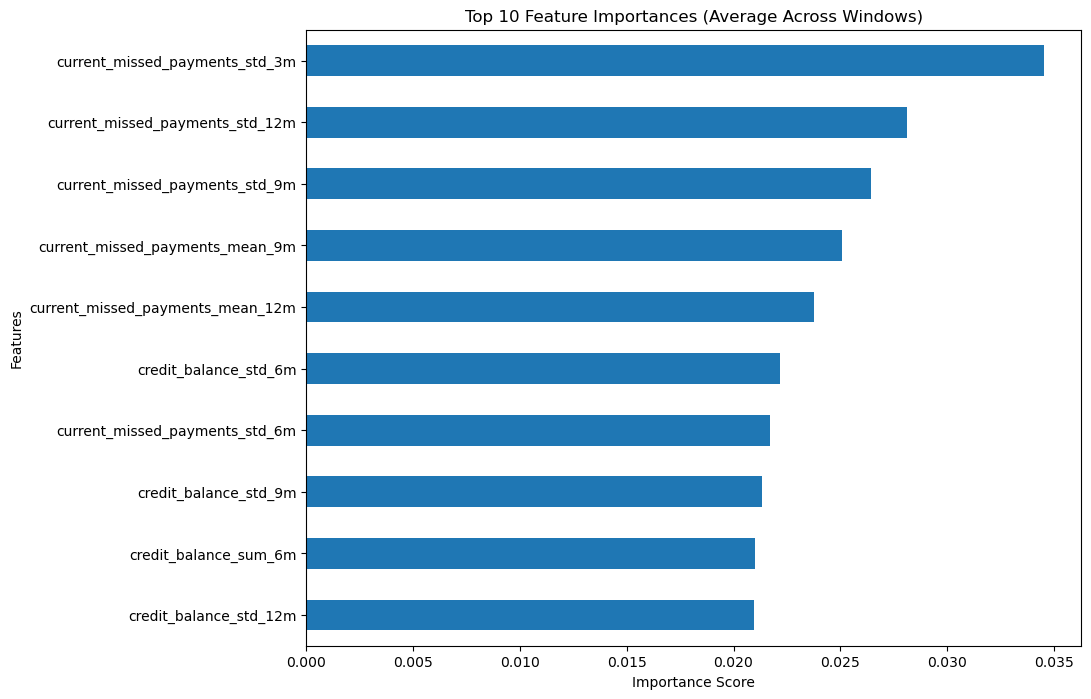

In [23]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score
import pandas as pd
import matplotlib.pyplot as plt

# Define the prediction windows
windows = [3, 6, 9, 12]

# Store results
accuracy_scores = {}
f1_scores = {}
feature_importances = {}

# Train Random Forest for each window
for window in windows:
    target = f'charge_off_within_{window}_months'
    
    # Prepare data
    X = data.drop(columns=['agent_id', 'charge_off_within_3_months', 
                           'charge_off_within_6_months', 
                           'charge_off_within_9_months', 
                           'charge_off_within_12_months'])
    y = data[target]
    
    # Train-test split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # Train Random Forest model
    rf_model = RandomForestClassifier(n_estimators=100, max_depth=10, class_weight='balanced', random_state=42)
    rf_model.fit(X_train, y_train)
    
    # Evaluate model
    y_pred = rf_model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    # Save scores
    accuracy_scores[window] = accuracy
    f1_scores[window] = f1
    
    # Extract feature importances
    feature_importances[window] = pd.Series(rf_model.feature_importances_, index=X.columns)
    
    print(f"Accuracy for {window}-month prediction: {accuracy:.4f}")
    print(f"F1 Score for {window}-month prediction: {f1:.4f}")

# Combine feature importances across all windows for visualization
average_importances = pd.concat(feature_importances, axis=1).mean(axis=1)
average_importances = average_importances.sort_values(ascending=False)

# Plot feature importances
plt.figure(figsize=(10, 8))
average_importances.head(10).plot(kind='barh')
plt.title("Top 10 Feature Importances (Average Across Windows)")
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.gca().invert_yaxis()
plt.show()


In [24]:
def check_date_range(df, date_column, table_name):
    print(f"Date range for {table_name}:")
    print(f"Start Date: {df[date_column].min()}")
    print(f"End Date: {df[date_column].max()}")
    print("-" * 40)

# Check date ranges
check_date_range(account_state_log, 'timestamp', 'Account State Log')
check_date_range(transactions_log, 'timestamp', 'Transactions Log')
check_date_range(payments_log, 'timestamp', 'Payments Log')

Date range for Account State Log:
Start Date: 2023-01-01 00:00:00
End Date: 2023-04-01 00:00:00
----------------------------------------
Date range for Transactions Log:
Start Date: 2023-01-01 00:05:05
End Date: 2023-03-31 14:47:33
----------------------------------------
Date range for Payments Log:
Start Date: 2023-01-01 01:32:57
End Date: 2023-03-31 10:53:19
----------------------------------------


In [ ]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score
import matplotlib.pyplot as plt

# Aggregate numerical features
def aggregate_all_features(log, group_col, exclude_cols=None):
    """
    Aggregates all numerical features in a log by mean, sum, std, max, min.

    Parameters:
    log (pd.DataFrame): The input data log.
    group_col (str): The column to group by (e.g., 'agent_id').
    exclude_cols (list): Columns to exclude from aggregation.

    Returns:
    pd.DataFrame: Aggregated features.
    """
    if exclude_cols is None:
        exclude_cols = []

    # Select numerical columns
    numerical_cols = log.select_dtypes(include=['float64', 'int64']).columns.difference(exclude_cols)

    # Aggregate statistics
    features = log.groupby(group_col).agg(
        {col: ['mean', 'sum', 'std', 'max', 'min'] for col in numerical_cols}
    )
    features.columns = ['_'.join(col) for col in features.columns]
    features.reset_index(inplace=True)
    return features

# One-hot encode non-numerical columns
def one_hot_encode_and_aggregate(log, group_col, categorical_cols):
    """
    One-hot encodes categorical columns and aggregates them by a grouping column.

    Parameters:
    log (pd.DataFrame): The input data log.
    group_col (str): The column to group by (e.g., 'agent_id').
    categorical_cols (list): List of categorical columns to one-hot encode.

    Returns:
    pd.DataFrame: Aggregated one-hot encoded features.
    """
    one_hot = pd.get_dummies(log[categorical_cols + [group_col]], columns=categorical_cols)
    aggregated = one_hot.groupby(group_col).sum().reset_index()
    return aggregated

# Process each table
def process_table(log, group_col, numerical_exclude_cols, categorical_cols):
    """
    Processes a table by aggregating numerical and one-hot encoded features.

    Parameters:
    log (pd.DataFrame): The input data log.
    group_col (str): The column to group by (e.g., 'agent_id').
    numerical_exclude_cols (list): Columns to exclude from numerical aggregation.
    categorical_cols (list): List of categorical columns to one-hot encode.

    Returns:
    pd.DataFrame: Processed features.
    """
    numerical_features = aggregate_all_features(log, group_col, exclude_cols=numerical_exclude_cols)
    if categorical_cols:
        categorical_features = one_hot_encode_and_aggregate(log, group_col, categorical_cols)
        return numerical_features.merge(categorical_features, on=group_col, how='outer')
    return numerical_features

# Aggregate account state log
account_features = process_table(
    account_state_log, 
    group_col='agent_id', 
    numerical_exclude_cols=['timestamp'], 
    categorical_cols=[]
)

# Aggregate transactions log
transaction_features = process_table(
    transactions_log, 
    group_col='agent_id', 
    numerical_exclude_cols=['timestamp'], 
    categorical_cols=['merchant_category', 'status']
)

# Aggregate payments log
payment_features = process_table(
    payments_log, 
    group_col='agent_id', 
    numerical_exclude_cols=['timestamp'], 
    categorical_cols=[]
)

# Merge all features
merged_features = account_features.merge(transaction_features, on='agent_id', how='outer')
merged_features = merged_features.merge(payment_features, on='agent_id', how='outer')

In [30]:
merged_features.colums

AttributeError: 'DataFrame' object has no attribute 'colums'

In [31]:
merged_features.columns.tolist()

['agent_id',
 'agent_id_mean_x',
 'agent_id_sum_x',
 'agent_id_std_x',
 'agent_id_max_x',
 'agent_id_min_x',
 'credit_balance_mean',
 'credit_balance_sum',
 'credit_balance_std',
 'credit_balance_max',
 'credit_balance_min',
 'credit_utilization_mean',
 'credit_utilization_sum',
 'credit_utilization_std',
 'credit_utilization_max',
 'credit_utilization_min',
 'current_missed_payments_mean',
 'current_missed_payments_sum',
 'current_missed_payments_std',
 'current_missed_payments_max',
 'current_missed_payments_min',
 'interest_rate_mean',
 'interest_rate_sum',
 'interest_rate_std',
 'interest_rate_max',
 'interest_rate_min',
 'min_payment_factor_mean',
 'min_payment_factor_sum',
 'min_payment_factor_std',
 'min_payment_factor_max',
 'min_payment_factor_min',
 'agent_id_mean_y',
 'agent_id_sum_y',
 'agent_id_std_y',
 'agent_id_max_y',
 'agent_id_min_y',
 'amount_mean_x',
 'amount_sum_x',
 'amount_std_x',
 'amount_max_x',
 'amount_min_x',
 'online_mean',
 'online_sum',
 'online_std',
 'o

Accuracy: 0.9993, F1 Score: 0.0000


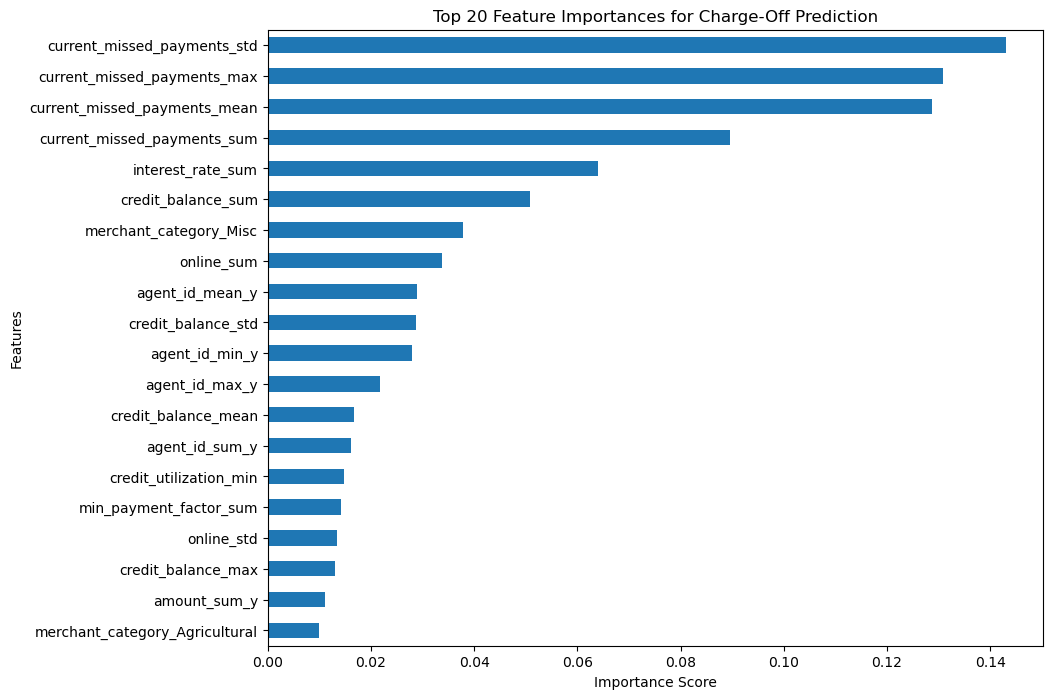

In [32]:
# Merge with labels
data = merged_features.merge(labels[['agent_id', 'charge_off_within_3_months']], on='agent_id', how='inner')

# Prepare data
X = data.drop(columns=['agent_id',
 'agent_id_mean_x',
 'agent_id_sum_x',
 'agent_id_std_x',
 'agent_id_max_x',
 'agent_id_min_x', 'agent_id_mean',
 'agent_id_sum',
 'agent_id_std',
 'agent_id_max',
 'agent_id_min','charge_off_within_3_months'])
y = data['charge_off_within_3_months']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Random Forest
rf_model = RandomForestClassifier(n_estimators=100, max_depth=10, class_weight='balanced', random_state=42)
rf_model.fit(X_train, y_train)

# Evaluate the model
y_pred = rf_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}, F1 Score: {f1:.4f}")

# Extract feature importances
feature_importances = pd.Series(rf_model.feature_importances_, index=X.columns)
feature_importances = feature_importances.sort_values(ascending=False)

# Plot the top 20 features
plt.figure(figsize=(10, 8))
feature_importances.head(20).plot(kind='barh')
plt.title("Top 20 Feature Importances for Charge-Off Prediction")
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.gca().invert_yaxis()
plt.show()

In [33]:
feature_importances

current_missed_payments_std         1.430478e-01
current_missed_payments_max         1.307576e-01
current_missed_payments_mean        1.286553e-01
current_missed_payments_sum         8.964520e-02
interest_rate_sum                   6.391396e-02
credit_balance_sum                  5.084516e-02
merchant_category_Misc              3.781226e-02
online_sum                          3.364525e-02
agent_id_mean_y                     2.881506e-02
credit_balance_std                  2.872664e-02
agent_id_min_y                      2.798916e-02
agent_id_max_y                      2.163402e-02
credit_balance_mean                 1.667283e-02
agent_id_sum_y                      1.615025e-02
credit_utilization_min              1.475960e-02
min_payment_factor_sum              1.425607e-02
online_std                          1.331521e-02
credit_balance_max                  1.300038e-02
amount_sum_y                        1.106055e-02
merchant_category_Agricultural      9.920606e-03
credit_utilization_s

In [48]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense, Masking
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score

# Step 1: Data Preparation
# Convert timestamps to datetime
for df in [transactions_log, payments_log, account_state_log]:
    df['timestamp'] = pd.to_datetime(df['timestamp'])

# Sort each dataset by agent_id and timestamp
transactions_log = transactions_log.sort_values(by=['agent_id', 'timestamp'])
payments_log = payments_log.sort_values(by=['agent_id', 'timestamp'])
account_state_log = account_state_log.sort_values(by=['agent_id', 'timestamp'])

# Merge datasets by agent_id and timestamp
agent_behavior = transactions_log.merge(account_state_log, on=['agent_id', 'timestamp'], how='outer')
agent_behavior = agent_behavior.merge(payments_log, on=['agent_id', 'timestamp'], how='outer')

# Fill missing values
agent_behavior = agent_behavior.fillna(0)

# Step 2: Feature Engineering
# Calculate time deltas
agent_behavior['time_delta'] = agent_behavior.groupby('agent_id')['timestamp'].diff().dt.days.fillna(0)

# Drop non-numeric columns for RNN
agent_behavior = agent_behavior.drop(columns=['timestamp', 'merchant_category', 'merchant_id'])

# Step 3: Create Sequences
# Group by agent_id and convert to sequences
grouped_sequences = agent_behavior.groupby('agent_id').apply(lambda x: x.drop(columns=['agent_id']).values)

# Pad sequences to ensure uniform length
padded_sequences = pad_sequences(grouped_sequences, padding='post', dtype='float32')

# Prepare labels (ensure alignment with sequence data)
agent_ids = agent_behavior['agent_id'].unique()
aligned_labels = labels.set_index('agent_id').reindex(agent_ids).fillna(0).values

# Step 4: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(padded_sequences, aligned_labels, test_size=0.2, random_state=42)

# Step 5: Build the RNN Model
model = Sequential([
    Masking(mask_value=0.0, input_shape=(padded_sequences.shape[1], padded_sequences.shape[2])),
    SimpleRNN(64, return_sequences=False),
    Dense(32, activation='relu'),
    Dense(4, activation='sigmoid')  # 4 outputs for 3, 6, 9, and 12-month predictions
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Step 6: Train the Model
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

# Step 7: Evaluate the Model
y_pred = (model.predict(X_test) > 0.5).astype(int)

# Calculate metrics for each charge-off window
results = {}
for i, window in enumerate(['3_months', '6_months', '9_months', '12_months']):
    accuracy = accuracy_score(y_test[:, i], y_pred[:, i])
    f1 = f1_score(y_test[:, i], y_pred[:, i])
    results[window] = {'accuracy': accuracy, 'f1_score': f1}

# Display results
print("Model Performance:")
print(results)

ModuleNotFoundError: No module named 'tensorflow.keras'

In [49]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, roc_auc_score
from datetime import timedelta

# Assuming dataframes are already loaded: account_state_log, transactions_log, payments_log, labels

# Convert timestamps to datetime
account_state_log['timestamp'] = pd.to_datetime(account_state_log['timestamp'])
transactions_log['timestamp'] = pd.to_datetime(transactions_log['timestamp'])
payments_log['timestamp'] = pd.to_datetime(payments_log['timestamp'])

# Define the time range
start_date = pd.to_datetime("2023-01-01")
end_date = start_date + pd.DateOffset(months=3)

# Filter data for the first 3 months
account_state_log = account_state_log[(account_state_log['timestamp'] >= start_date) & 
                                      (account_state_log['timestamp'] < end_date)]
transactions_log = transactions_log[(transactions_log['timestamp'] >= start_date) & 
                                    (transactions_log['timestamp'] < end_date)]
payments_log = payments_log[(payments_log['timestamp'] >= start_date) & 
                            (payments_log['timestamp'] < end_date)]

# Weekly aggregation
def aggregate_weekly(df, date_col, group_col, agg_dict):
    df['week'] = df[date_col].dt.to_period('W').apply(lambda r: r.start_time)
    return df.groupby([group_col, 'week']).agg(agg_dict).reset_index()

# Account State Log Features
account_features = aggregate_weekly(
    account_state_log, 'timestamp', 'agent_id',
    {
        'credit_balance': ['mean', 'min', 'max', 'std'],
        'credit_utilization': ['mean', 'min', 'max', 'std'],
        'interest_rate': ['mean', 'std'],
        'current_missed_payments': ['sum']
    }
)
account_features.columns = ['agent_id', 'week'] + [f"account_{col[0]}_{col[1]}" for col in account_features.columns[2:]]

# Transactions Log Features
transaction_features = aggregate_weekly(
    transactions_log, 'timestamp', 'agent_id',
    {
        'amount': ['mean', 'sum', 'max'],
        'online': ['sum'],
        'status': lambda x: (x == 'approved').sum() / len(x)  # Approval rate
    }
)
transaction_features.columns = ['agent_id', 'week'] + [f"transaction_{col[0]}_{col[1]}" for col in transaction_features.columns[2:]]

# Payments Log Features
payment_features = aggregate_weekly(
    payments_log, 'timestamp', 'agent_id',
    {
        'amount': ['mean', 'sum', 'max']
    }
)
payment_features.columns = ['agent_id', 'week'] + [f"payment_{col[0]}_{col[1]}" for col in payment_features.columns[2:]]

# Merge all features
features = account_features.merge(transaction_features, on=['agent_id', 'week'], how='outer')
features = features.merge(payment_features, on=['agent_id', 'week'], how='outer')

# Forward-fill missing weeks for each agent
features = features.groupby('agent_id').apply(lambda x: x.sort_values('week').ffill().bfill()).reset_index(drop=True)

# Align with labels
labels['timestamp'] = start_date + pd.DateOffset(months=3)  # Align with the end of the 3-month period
final_data = features.merge(labels[['agent_id', 'charge_off_within_3_months']], on='agent_id', how='inner')

# Split data
X = final_data.drop(['agent_id', 'week', 'charge_off_within_3_months'], axis=1)
y = final_data['charge_off_within_3_months']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')
rf_model.fit(X_train, y_train)

# Evaluate
y_pred = rf_model.predict(X_test)
y_prob = rf_model.predict_proba(X_test)[:, 1]
print(classification_report(y_test, y_pred))
print("AUC-ROC:", roc_auc_score(y_test, y_prob))

/var/folders/9y/l5hhng65561dy6k5_q7mjj2c0000gn/T/ipykernel_13839/1308629637.py:69: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  features = features.groupby('agent_id').apply(lambda x: x.sort_values('week').ffill().bfill()).reset_index(drop=True)


              precision    recall  f1-score   support

           0       1.00      1.00      1.00     11528
           1       1.00      0.19      0.31        27

    accuracy                           1.00     11555
   macro avg       1.00      0.59      0.66     11555
weighted avg       1.00      1.00      1.00     11555

AUC-ROC: 0.9988578533425861


In [50]:
features

,agent_id,week,account_credit_balance_mean,account_credit_balance_min,account_credit_balance_max,account_credit_balance_std,account_credit_utilization_mean,account_credit_utilization_min,account_credit_utilization_max,account_credit_utilization_std,...,account_interest_rate_std,account_current_missed_payments_sum,transaction_amount_mean,transaction_amount_sum,transaction_amount_max,transaction_online_sum,transaction_status_<lambda>,payment_amount_mean,payment_amount_sum,payment_amount_max
0,0,2022-12-26,631.101415,631.101415,631.101415,157.626832,0.126000,0.126,0.126,0.031501,...,0.0,0,81.430000,81.43,81.43,1.0,1.0,2925.82,2925.82,2925.82
1,0,2023-01-02,924.422844,746.051415,1175.611415,157.626832,0.184571,0.149,0.235,0.031501,...,0.0,0,108.902000,544.51,118.23,3.0,1.0,2925.82,2925.82,2925.82
2,0,2023-01-09,1689.707130,1276.211415,2060.381415,307.060807,0.337714,0.255,0.412,0.061494,...,0.0,0,126.395714,884.77,289.45,2.0,1.0,2925.82,2925.82,2925.82
3,0,2023-01-16,2377.392844,2149.531415,2561.461415,156.995228,0.475286,0.430,0.512,0.031282,...,0.0,0,100.216000,501.08,114.95,3.0,1.0,2925.82,2925.82,2925.82
4,0,2023-01-23,2715.249987,2561.461415,2780.291415,87.778626,0.542857,0.512,0.556,0.017696,...,0.0,0,109.415000,218.83,118.23,1.0,1.0,2925.82,2925.82,2925.82
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57767,18095,2023-03-27,847.473215,847.473215,847.473215,NaN,0.282000,0.282,0.282,NaN,...,NaN,0,281.630000,281.63,281.63,1.0,1.0,NaN,NaN,NaN
57768,18097,2023-03-27,919.299013,919.299013,919.299013,NaN,0.184000,0.184,0.184,NaN,...,NaN,0,281.630000,281.63,281.63,0.0,1.0,NaN,NaN,NaN
57769,18098,2023-03-27,692.018413,692.018413,692.018413,NaN,0.138000,0.138,0.138,NaN,...,NaN,0,281.630000,281.63,281.63,1.0,1.0,NaN,NaN,NaN
57770,18099,2023-03-27,628.212556,628.212556,628.212556,NaN,0.314000,0.314,0.314,NaN,...,NaN,0,114.330000,114.33,114.33,0.0,1.0,NaN,NaN,NaN


In [53]:
from sklearn.impute import SimpleImputer
from imblearn.over_sampling import SMOTE
from sklearn.metrics import accuracy_score

# Impute missing values
imputer = SimpleImputer(strategy="mean")  # Use 'median' or other strategies if needed
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

# Apply SMOTE to the imputed training data
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train_imputed, y_train)

# Train Random Forest with SMOTE-applied data
rf_model_smote = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')
rf_model_smote.fit(X_train_smote, y_train_smote)

# Predict on test data
y_pred = rf_model_smote.predict(X_test_imputed)
y_prob = rf_model_smote.predict_proba(X_test_imputed)[:, 1]

# Evaluate model performance
accuracy = accuracy_score(y_test, y_pred)
classification_report_output = classification_report(y_test, y_pred)
auc_roc = roc_auc_score(y_test, y_prob)

print("Classification Report:")
print(classification_report_output)
print(f"Accuracy: {accuracy:.4f}")
print(f"AUC-ROC: {auc_roc:.4f}")

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     11528
           1       0.48      0.44      0.46        27

    accuracy                           1.00     11555
   macro avg       0.74      0.72      0.73     11555
weighted avg       1.00      1.00      1.00     11555

Accuracy: 0.9976
AUC-ROC: 0.9632
